<a href="https://colab.research.google.com/github/C-Little26/ECGR4105/blob/main/Hw3/ECGR4105Hw3_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ECGR 4105 Homework 3 Problem 1
#Chris Little

In [ ]:
#necessary libraries
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import the dataset for problem 1
filepath_dia = '/content/drive/My Drive/Machine Learning/Datasets/diabetes.csv'
diabetes = pd.DataFrame(pd.read_csv(filepath_dia))
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Problem 1
#Using the diabetes dataset, build a logistic regression binary classifier for positive diabetes.
#Please use 80% and 20% split between training and evaluation (test).
#Make sure to perform proper scaling and standardization before your training.
#Report the classification accuracy over iterations. Also, report your results, including accuracy, precision, and recall, FI score.
#At the end, plot the confusion matrix representing your binary classifier.

In [ ]:
Y = diabetes.pop('Outcome')
X = diabetes

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size =0.2, random_state = 0)
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150,78,29,126,35.2,0.692,54
118,4,97,60,23,0,28.2,0.443,22
247,0,165,90,33,680,52.3,0.427,23
157,1,109,56,21,135,25.2,0.833,23
468,8,120,0,0,0,30.0,0.183,38


In [ ]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_val = sc_x.fit_transform(x_val)

In [ ]:
classifier = LogisticRegression(random_state=0, penalty='none')
classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none', random_state=0)

In [ ]:
y_pred = classifier.predict(x_val)

In [ ]:
cnf_mat = confusion_matrix(y_val, y_pred)
cnf_mat

array([[94, 13],
       [18, 29]])

In [ ]:
#print metrics of classifier
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))
print("F1 Score:", metrics.f1_score(y_val,y_pred))

Accuracy: 0.7987012987012987
Precision: 0.6904761904761905
Recall: 0.6170212765957447
F1 Score: 0.651685393258427


Text(0.5, 427.9555555555555, 'Predicted label')

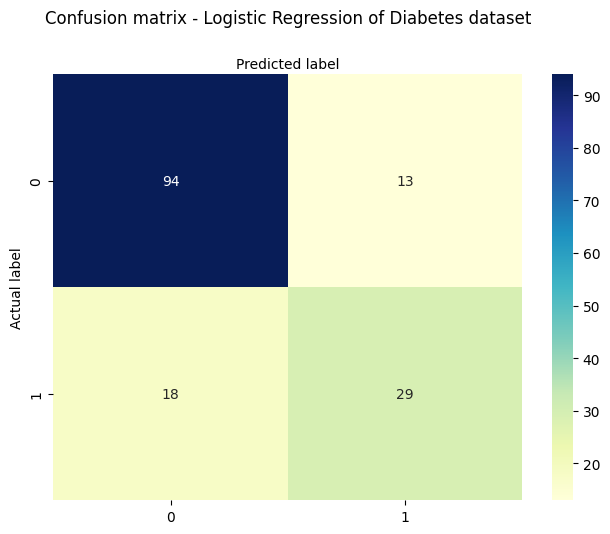

In [ ]:
#draw confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sea.heatmap(pd.DataFrame(cnf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Logistic Regression of Diabetes dataset', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')